# IA - Tercera Práctica - Player Value
                                                                                                 Autor: David Santomé Galván

En esta tercera práctica de inteligencia artificial se debe realizar una predicción sobre el valor de un jugador del fifa mediante una regresión lineal

Enlace al repositorio público: https://github.com/SGDavid2719/IA-MachineLearning_PlayerValue

Primeramente se importarán las librerías necesarias para realizar la práctica. Para la instalación de las librerías como matplotlib se ha facilitado un requirements.txt

In [1]:
import os

#Librerías análisis de datos
import pandas as pd
import numpy as np

#Librerías gráficas
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias modelado
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

# Carga de datos

Para realizar la práctica se usará un documento de datos sobre el fifa y mediante *pandas* y la librería *os* cargaremos dichos datos. Además, modificando la opció *display.max_columns* podremos ver todas las columnas del dataframe

In [2]:
df = pd.read_csv(os.path.join("../in/fifa.csv"))
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

# Información previa sobre los datos

Con la función *shape* podemos observar el número de datos que tenemos y el número total de columnas.

In [3]:
df.shape

(18207, 89)

Muchas veces los dataframes contienen datos nulos por diversos motivos, como por ejemplo: un jugador no tiene club porque el fifa no tiene los derechos sobre el club para poder incluirlo en el juego o es muy pequeño y no interesa; también puede ser que no se tengan la altura y el peso de un jugador en específico por cualquier otro motivo, etc.

Es importante tratar estos datos para poder trabajar sobre el dataframe

Por tanto, mediante *isna()* podemos obtener los valores nulos y con *sum()* obtendremos el total de dichos valores

In [4]:
pd.set_option('display.max_rows', 89)
df.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

Además, podemos obtener la información detallada de cada variable para así saber un dato importante como el tipo mediante la instrucción *info()*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Finalmente podemos obtener unas estadísticas básicas sobre nuestro dataframe con la instrucción *describe()*

In [6]:
df.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number      Crossing     Finishing  HeadingAccuracy  \
count   18147.000000  18159.000000  18159.000000     18159.000000   
mean       19.546096     49.734181     45.550911        52.298144   
std        15.947765     18.364524     19.525820        17.379909   
min         1.000000      5.000000      2.000000         4.000000   
25%         8.000000     38.000000     30.000000        44.000000   
50%        17.000000     54.000000     49.000000        56.000000   
75%        26.000000     64.000000     62.000000        64.000000   
max        99.000000     93.000000     95.000000        94.000000   

       ShortPassing       Volleys     Dribbling         Curve    FKAccuracy  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.686712     42.909026     55.371001     47.170824     42.863153   
std       14.699495     17.694408     18.910371     18.395264     17.478763   
min        7.000000      4.000000      4.000000      6.000000      3.000000   
25%       54.000000     30.000000     49.000000     34.000000     31.000000   
50%       62.000000     44.000000     61.000000     48.000000     41.000000   
75%       68.000000     57.000000     68.000000     62.000000     57.000000   
max       93.000000     90.000000     97.000000     94.000000     94.000000   

        LongPassing   BallControl  Acceleration   SprintSpeed       Agility  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      52.711933     58.369459     64.614076     64.726967     63.503607   
std       15.327870     16.686595     14.927780     14.649953     14.766049   
min        9.000000      5.000000     12.000000     12.000000     14.000000   
25%       43.000000     54.000000     57.000000     57.000000     55.000000   
50%       56.000000     63.000000     67.000000     67.000000     66.000000   
75%       64.000000     69.000000     75.000000     75.000000     74.000000   
max       93.000000     96.000000     97.000000     96.000000     96.000000   

          Reactions       Balance     ShotPower       Jumping       Stamina  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      61.836610     63.966573     55.460047     65.089432     63.219946   
std        9.010464     14.136166     17.237958     11.820044     15.894741   
min       21.000000     16.000000      2.000000     15.000000     12.000000   
25%       56.000000     56.000000     45.000000     58.000000     56.000000   
50%       62.000000     66.000000     59.000000     66.000000     66.00000

# Eliminación de datos no significativos

Para tratar los datos y no machacar nuestro dataframe primero se realizará una copia mediante la instrucción *copy()*

In [7]:
df_copy = df.copy()

Una vez realizada la copia, antes de empezar a analizar los datos y formatear algunos de ellos de tipo objeto importantes para la regresión, observaremos aquellos datos que a simple vista son poco relevantes para obtener el valor de un jugador o incluso no la tienen

Un ejemplo son las fotos, las cuales no influye de ninguna manera sobre el valor de un jugador, por tanto, esta misma lógica la podemos aplicar sobre banderas, número del dorsal, si la cara en el juego es la real, etc.

Otros ejemplos menos intuitivos pueden ser la altura o el peso, sin embargo, un ojeador no recomienda un jugador por su altura o por el peso, ya que la altura en el fútbol no es tan importante como otros deportes (ejemplo: el baloncesto) y; el peso, es relativo a la persona ya que depende de otros factores (constitución, musculación, etc.)

Estos datos son por ejemplo:
*   Id
*   Fotos
*   Banderas
*   Logo del Club
*   De dónde ha sido cedido
*   Cuando ingresó en el club
*   Número del dorsal
*   Tipo de cuerpo
*   Si la cara en el juego es la real
*   La altura
*   El peso
*   El nombre
*   Cuando se termina su contrato
*   El pie bueno y malo









In [8]:
df_copy.drop(['Unnamed: 0', 'ID', 'Photo','Flag','Club Logo', 'Loaned From', 'Joined', 'Jersey Number','Body Type', 'Real Face', 'Name','Contract Valid Until','Weight','Height', 'Preferred Foot', 'Weak Foot' ],axis=1,inplace=True)

Como vimos anteriormente con los datos nulos, pudimos observar que el número 48 se repetía con bastante frecuencia y, por tanto, probablemente las filas con dichos datos sean de los mismos jugadores. Para ello, listaremos 2 columnas sin importar cuales y si los datos son los mismos, eliminaremos dichos jugadores porque al ser pocos el impacto será pequeño. El método *isnull()* permite seleccionar únicamente los valores nulos y con *tolist()* devuelve una lista de valores

In [9]:
columnaAleatoria1 = df_copy[df_copy['Work Rate'].isnull()].index.tolist()
columnaAleatoria2 = df_copy[df_copy['Positioning'].isnull()].index.tolist()
if columnaAleatoria1 == columnaAleatoria2:
  print('Son los mismos datos')
else:
  print('Son datos distintos')

Son los mismos datos


Al ser los mismos datos procedemos a eliminar estas filas para dejar de tener dichos datos nulos. Se realiza mediante *drop* de los índices contenidos en *columnaAnterior1* y con *inplace=True* actualizamos el dataframe

In [10]:
df_copy.drop(df_copy.index[columnaAleatoria1], inplace=True)
df_copy.isna().sum().T

Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
International Reputation       0
Skill Moves                    0
Work Rate                      0
Position                      12
LS                          2037
ST                          2037
RS                          2037
LW                          2037
LF                          2037
CF                          2037
RF                          2037
RW                          2037
LAM                         2037
CAM                         2037
RAM                         2037
LM                          2037
LCM                         2037
CM                          2037
RCM                         2037
RM                          2037
LWB                         2037
LDM                         2037
CDM       

Por el mismo motivo de antes, al ser 12 en *position* podemos eliminar los datos nulos directamente

In [11]:
df_copy.dropna(subset=['Position'], inplace=True)

Para el resto de columnas podemos realizar varias alternativas para gestionar los datos nulos:

*   Eliminarlos del dataframe
*   Eliminar la columna del dataframe
*   Rellenar con algún valor (cero, media, mediana, etc)

En este caso, se ha decidido rellenarlos con la media en el caso de *Release Clause* y las estadísticas *ST, LS, etc*, pero sin embargo, estos datos son de tipo objeto así que primero habrá que formatearlos. Además, en *Club* no podremos realizar las soluciones anteriores, por tanto, eliminaremos la columna directamente ya que realmente pertenecer a un club prestigioso ayuda pero no es realmente significativo a la hora de determinar el valor de un jugador




In [12]:
df_copy.drop(['Club'],axis=1,inplace=True)

# Data Analysis

Para poder interpretar los valores de nuestro dataframe, primeramente deberemos formatear algunos valores de tipo objeto. Para ello, se utilizará funciones que luego se aplicarán sobre las columnas correspondientes

La primera función es para cambiar los valores de tipo objeto que representan dinero a valores interpretables por la máquina de tipo float. Como tenemos aún valores nulos, al intentar transformarlos saltará un error y por tanto se gestionará devolviendo el mismo valor nulo así luego se podrá rellenar con la media

In [13]:
def value_to_float(x):
  try:
    x = x.replace('€', '')
    ret_val = 0.0
      
    if type(x) == float or type(x) == int:
      ret_val = x
    if 'K' in x:
      if len(x) > 1:
        ret_val = float(x.replace('K', ''))
      ret_val = ret_val *1000
    if 'M' in x:
      if len(x) > 1:
        ret_val = float(x.replace('M', ''))
      ret_val = ret_val * 1000000.0
  except AttributeError:
      ret_val = x
  return ret_val

Para aplicarlo sobre las columnas que deseamos se hace con *apply()*

In [14]:
df_copy['Value'] = df_copy['Value'].apply(value_to_float)
df_copy['Wage'] = df_copy['Wage'].apply(value_to_float)
df_copy['Release Clause'] = df_copy['Release Clause'].apply(value_to_float)

Una vez formateados podemos proceder a rellenar los valores nulos con la media mediante *fillna()* y se obtendrá la media con *mean()*

In [15]:
df_copy['Release Clause'].fillna((df_copy['Release Clause'].mean()), inplace = True)

La siguiente función es para los valores de cada jugador en una posición en específico y únicamente se le aplicará una conversión a float y en caso de valores nulos saltará un error que será gestionado como en la función anterior

In [16]:
def stat_to_float(x):
  try:
    valueS = float(x)
  except AttributeError:
      valueS = x
  return valueS

Para formatear los datos se recorren las columnas desde la número 11 hasta la 37 (estos números podemos obtenerlos mediante *info()* o imprimiendo el nombre de las columnas mediante *columns* y contar los índices). Los valores de dichas columnas se eliminará todo aquello posterior al signo *+* mediante *str.split()*, se aplicará la conversión a float y se eliminará la columna previa

In [17]:
df_copy.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'International Reputation', 'Skill Moves', 'Work Rate',
       'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [18]:
for column in df_copy.columns[11:37]:
  tmpS = df_copy[column].str.split("+", n = 1, expand = True)
  df_copy[column+"_New"] = tmpS[0]
  df_copy[column+"_New"] = df_copy[column+"_New"].apply(stat_to_float)
  df_copy = df_copy.drop([column], axis = 1)

Una vez hemos formateado también las estadísticas podemos llenarlas con la media , realizamos un recorrido sobre las columnas y aquellas que terminan en *_New* serán sus valores nulos rellenados  con la media 

In [19]:
for column in df_copy.columns:
  if column.endswith('_New'):
    df_copy[column].fillna((df_copy[column].mean()), inplace = True)

Otro objeto a formatear es el ratio de trabajo de un jugador que separaremos en dos distintos para simplificarlo y eliminaremos la columna compuesta

In [20]:
tmpW = df_copy["Work Rate"].str.split("/ ", n = 1, expand = True) 
df_copy["WorkRate1"] = tmpW[0]   
df_copy["WorkRate2"]= tmpW[1]
df_copy = df_copy.drop(['Work Rate'], axis = 1)

Para finalizar el analisis de datos, debemos formatear aquellos objetos que no podamos transformar a float mediante *get_dummies()*, como por ejemplo *Position*, *Nationality* o las nuevas columnas de *Work Rate*. Sin embargo, la posición y la nacionalidad previamente podemos simplificarlas o evaluar si son importantes para cuando hagamos dummmy codes no salgan una cantidad inmensa de columnas

En el caso de las posiciones podemos hacer 2 cosas:

*   Agrupar las posiciones en posiciones mucho más generales como portero (GK), delantero (ST), etc.
*   Eliminar las columna

En este caso se estudia y se puede intuir que el valor de un jugador puede fluctuar dependiendo de la posición en la que juegue, pero este valor realmente cambia dependiendo de la necesidad de los clubes en tener un jugador para dicha posición. Por tanto, se decide eliminar la columna por su relevancia



In [21]:
df_copy = df_copy.drop(['Position'], axis = 1)

Para las nacionalidades por ejemplo, podemos clasificar en si tienen una cantidad de jugadores mayor a un número con el valor '1' y el resto con el valor '0'

Para realizar dicha clasificación, primero miraremos cuantos jugadores tienen por nacionalidad mediante *value_counts* y para saber el número total de países se utilizando *nunique()*

In [22]:
print('Número total de países : {0}'.format(df_copy['Nationality'].nunique()))
print(df_copy['Nationality'].value_counts().head(50))

Número total de países : 164
England                1657
Germany                1195
Spain                  1071
Argentina               936
France                  911
Brazil                  825
Italy                   699
Colombia                616
Japan                   478
Netherlands             452
Sweden                  396
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  348
Norway                  341
Saudi Arabia            337
Denmark                 335
Korea Republic          333
Portugal                322
Turkey                  303
Austria                 296
Scotland                283
Belgium                 259
Australia               236
Switzerland             220
Uruguay                 149
Senegal                 130
Wales                   129
Croatia                 126
Serbia                  126
Nigeria                 121
Ghana              

Podemos observar que a partir de 220 el número decrece con rapidez y se estanca en valores pequeños, por tanto, podemos definir que el valor para pertenecer a una nacionalidad mayoritaria será a partir de 220

En esta función se obtienen el recuento de jugadores por nacionalidad (*totalN*), se listan en caso de tener un total mayor o igual a 220 (*nList*) y si el valor está en dicha lista (*df_copy.Nationality in nList*) devuelve un *1*, en caso contrario, el valor *0*

In [23]:
totalN = df_copy.Nationality.value_counts()
nList = totalN[totalN >= 220].index.tolist()
def nClasificacion(df_copy):
  if (df_copy.Nationality in nList):
    return 1
  else:
    return 0

df_copy['Major_Nation'] = df_copy.apply(nClasificacion,axis = 1)
df_copy = df_copy.drop(['Nationality'], axis = 1)

Realizamos dummy encode en *WorkRate1* y *WorkRate2* para transformar aquellos valores de tipo objeto no numéricos en valores *0* (en caso no perteneciente) o *1* (viceversa) sobre cada columna creada de los distintos valores que toma la columna previa y, así poder manipularlos y utilizarlos para la regresión

In [24]:
wrk1 = df_copy.pop("WorkRate1")
df_copy = pd.concat([df_copy.reset_index(drop=True), pd.get_dummies(wrk1, prefix='wrk1').reset_index(drop=True)], axis=1, sort=False)

In [25]:
wrk2 = df_copy.pop("WorkRate2")
df_copy = pd.concat([df_copy.reset_index(drop=True), pd.get_dummies(wrk2, prefix='wrk2').reset_index(drop=True)], axis=1, sort=False)

Mediante *info()* podemos observar si hemos formateado todos los datos o queda algo por hacer antes de terminar este apartado

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   Value                     18147 non-null  float64
 4   Wage                      18147 non-null  float64
 5   Special                   18147 non-null  int64  
 6   International Reputation  18147 non-null  float64
 7   Skill Moves               18147 non-null  float64
 8   Crossing                  18147 non-null  float64
 9   Finishing                 18147 non-null  float64
 10  HeadingAccuracy           18147 non-null  float64
 11  ShortPassing              18147 non-null  float64
 12  Volleys                   18147 non-null  float64
 13  Dribbling                 18147 non-null  float64
 14  Curve 

Para finalizar el análisis de datos verificamos el número de datos restantes para evaluar si a primera vista hemos machacado en exceso el dataframe

In [27]:
df_copy.shape

(18147, 76)

# EDA (Exploratory Data Analysis)

Tras haber analizado los datos y haberlos formateado realizaremos un estudio más en profundidad mediante gráficos para ver qué variables son realmente significativas a la hora de realizar la predicción sobre el valor de un jugador

Podemos observar la distribución del valor de los jugadores mediante *histplot()*

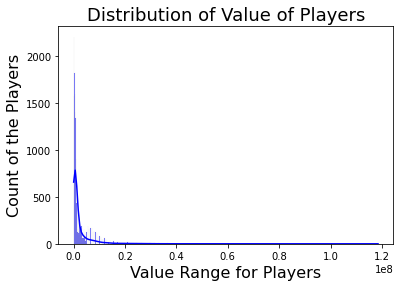

In [28]:
sns.histplot(df_copy['Value'], color = 'blue', kde = True)
plt.xlabel('Value Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Value of Players', fontsize = 18)
plt.show()

También podemos observar la matriz de correlación con *heatmap(df.corr())*, muy útil para conocer la correlación entre las distintas columnas y así más adelante poder tomar decisiones sobre el dataframe antes de empezar a modelar

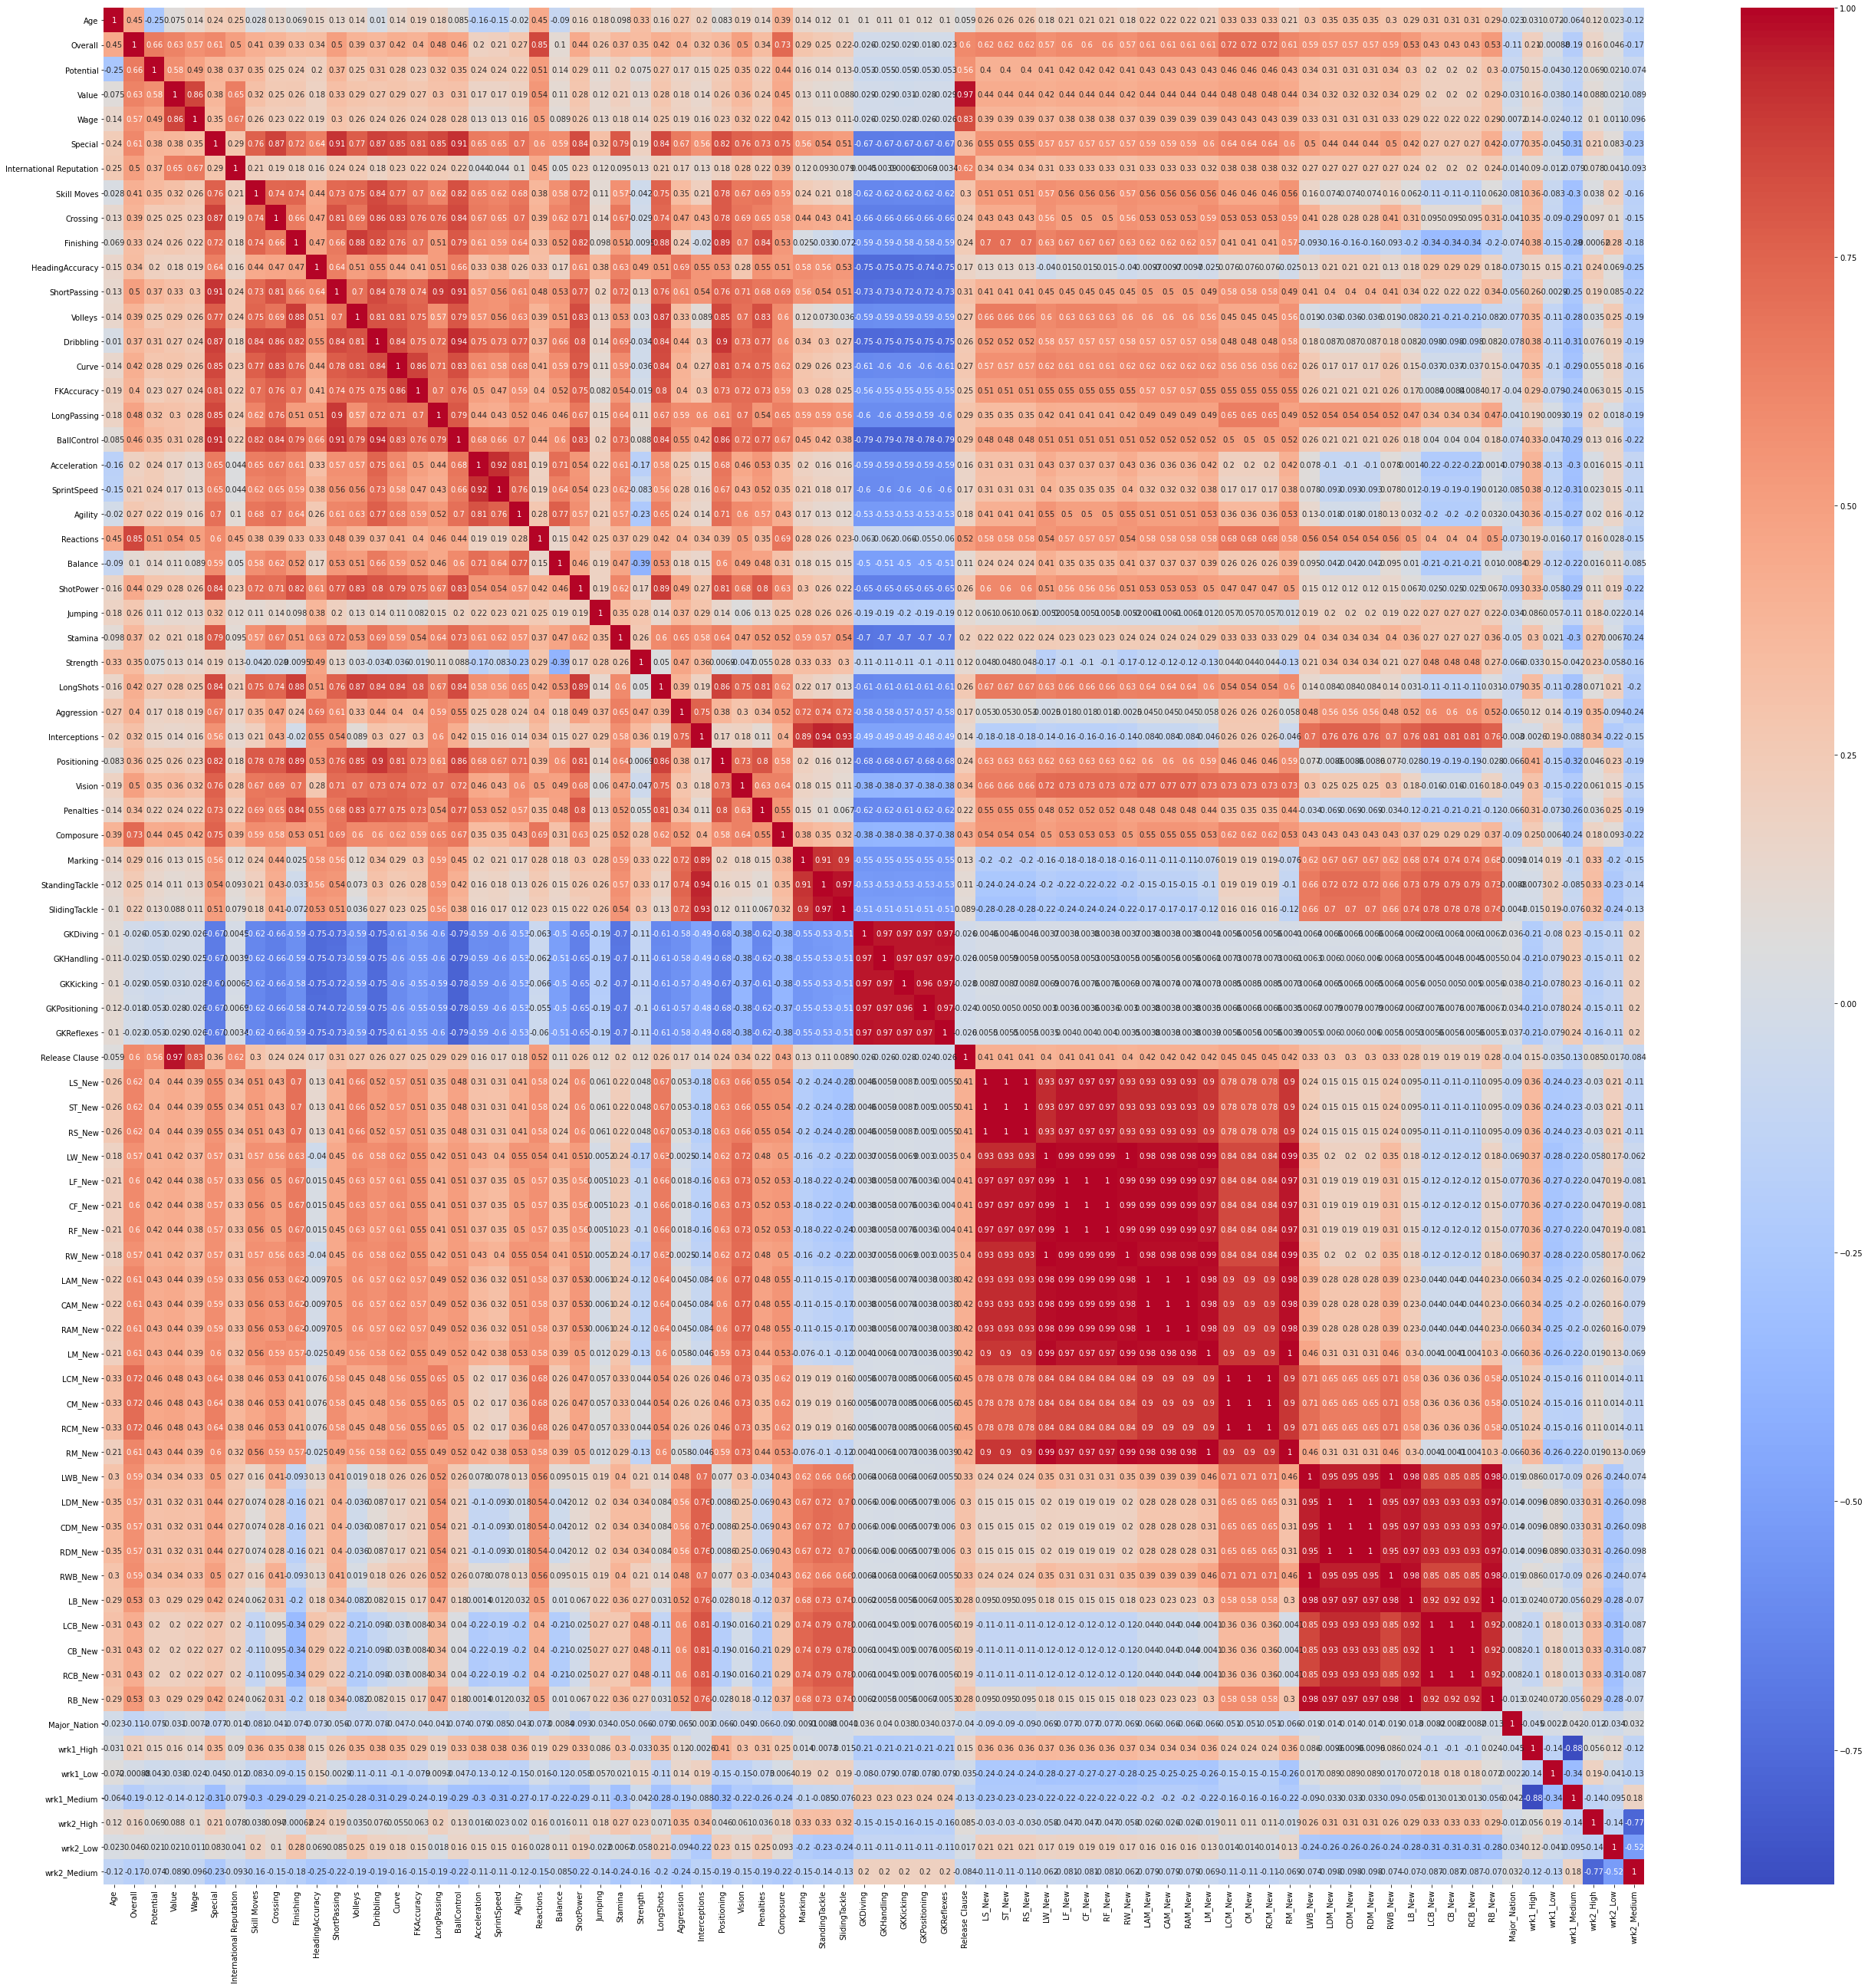

In [29]:
plt.subplots(figsize=(45,45))
sns.heatmap(df_copy.corr(), cmap='coolwarm',annot=True);

Tras la matriz de correlación podemos observar un conjunto de variables con una correlación más alta que el resto respecto a *Value* y por tanto decidimos observar esta correlación lineal que existe entre ellas por separado mediante *scatter_matrix*

In [30]:
fig = px.scatter_matrix(df_copy, dimensions=["Value", "Wage", "International Reputation", "Potential", "Reactions"])
fig.update_traces(diagonal_visible=False)
fig.show()

En la matriz de correlación también pudimos observar la alta correlación existente entre *Release Clause* y *Overall* frente a la variable *Value* y, por tanto, decidimos observar dicha correlación por separado mediante *scatter()*

In [31]:
px.scatter(x = df_copy['Release Clause'], y =df_copy['Value'], color=df_copy['Overall'])

Tras haber visto un par de gráficos podemos sacar las siguientes conclusiones:

*   El valor de los jugadores está muy concentrado en el lado izquierdo de la gráfica, hay valores realmente altos alejados de la mayoría
*   La matriz de correlación muestra variables con fuerte correlación con la variable *value* y también podemos identificar correlaciones entre otras variables
*   Existe una correlación entre *Value* y *Wage*, *Potential*, *Reactions* e *International Reputation*
*   Existe una fuerte correlación lineal entre *Value*, *Release Clause* y *Overall*





Como se ha mencionado previamente, mediante la matriz de correlación podemos visualizar variables que guardan una gran correlación entre ellas y, por tanto, si nos quedamos con una única variable y eliminamos las restantes, el dataframe no se verá afectado. 

Las siguientes variables son las que nos quedaremos y borraremos todas aquellas con las que tenga una correlación extremadamente fuerte (mayor a 0.9 por ejemplo):

*   Mantenemos: Aceleration / Eliminamos: SprintSpeed
*   Mantenemos: Marking / Eliminamos: StandingTackle, SlidingTackle
*   Mantenemos: GKDiving / Eliminamos: GKHandling, GKKicking, GKPositioning, GKReflexes
*   Mantenemos: LS_New / Eliminamos: ST_New hasta RM_New
*   Mantenemos: LWB_New / Eliminamos: LDM_New hasta RB_New

Para saber el nombre y número de las columnas utilizamos *info()*







In [32]:
df_copy.drop(['SprintSpeed'], axis=1, inplace=True)
df_copy.drop(['StandingTackle', 'SlidingTackle'], axis=1, inplace=True)
df_copy.drop(['GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   Value                     18147 non-null  float64
 4   Wage                      18147 non-null  float64
 5   Special                   18147 non-null  int64  
 6   International Reputation  18147 non-null  float64
 7   Skill Moves               18147 non-null  float64
 8   Crossing                  18147 non-null  float64
 9   Finishing                 18147 non-null  float64
 10  HeadingAccuracy           18147 non-null  float64
 11  ShortPassing              18147 non-null  float64
 12  Volleys                   18147 non-null  float64
 13  Dribbling                 18147 non-null  float64
 14  Curve 

En dos array distintos definiremos los rangos de columnas consecutivas que procederemos a eliminar en vez de poner los nombres uno a uno

In [34]:
drop_cols1 = df_copy.columns[37:52]
drop_cols2 = df_copy.columns[53:62]
df_copy.drop(drop_cols1, axis=1, inplace=True)
df_copy.drop(drop_cols2, axis=1, inplace=True)

# Modelado

Una vez hemos terminado de representar los datos y observar la correlación de manera gráfica, antes de empezar de modelar volveremos a observar esta correlación frente a *Value* en valor absoluto mediante *corr().abs()* para volver a evaluar posibles variables poco significativas

In [35]:
corr_matrix = df_copy.corr().abs()
corr_matrix['Value'].sort_values(ascending=False)

Value                       1.000000
Release Clause              0.972275
Wage                        0.858376
International Reputation    0.653152
Overall                     0.627025
Potential                   0.576606
Reactions                   0.540607
Composure                   0.450381
LS_New                      0.438642
Special                     0.377764
Vision                      0.357577
LWB_New                     0.340867
ShortPassing                0.327572
Skill Moves                 0.315624
BallControl                 0.308818
LongPassing                 0.302080
Volleys                     0.288254
Curve                       0.287208
ShotPower                   0.281381
LongShots                   0.279729
Dribbling                   0.271989
FKAccuracy                  0.265787
Positioning                 0.259391
Finishing                   0.256759
Crossing                    0.249787
Penalties                   0.239202
Stamina                     0.210737
A

Para evaluar aquellas columnas poco significativas se podría coger cualquier hipótesis, sin embargo, si el valor es muy pequeño el nivel de flexibilidad sería alto y viceversa. Por tanto, se eliminan las columnas con un valor de correlación menor a *0.1* y para ello se define una iteración sobre los valores de la correlación y, en caso de eliminar la columna porque *value < 0.1*, no se incrementará el contador porque la columna que ocupa esa posición tras ser eliminada la ocupará otra en su lugar

In [36]:
i = 0
for value in corr_matrix['Value']:
  if value < 0.1:
    df_copy.drop(df_copy.columns[i], axis=1, inplace=True)
  else:
    i=i+1

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   18147 non-null  int64  
 1   Potential                 18147 non-null  int64  
 2   Value                     18147 non-null  float64
 3   Wage                      18147 non-null  float64
 4   Special                   18147 non-null  int64  
 5   International Reputation  18147 non-null  float64
 6   Skill Moves               18147 non-null  float64
 7   Crossing                  18147 non-null  float64
 8   Finishing                 18147 non-null  float64
 9   HeadingAccuracy           18147 non-null  float64
 10  ShortPassing              18147 non-null  float64
 11  Volleys                   18147 non-null  float64
 12  Dribbling                 18147 non-null  float64
 13  Curve                     18147 non-null  float64
 14  FKAccu

Separamos las variables en *train* y *test* mediante *train_test_split()* definiendo un tamaño de test (por ejemplo 0.3) y un *random_state* para una elección de datos aleatoria. Observamos el tamaño de cada uno

In [38]:
y = df_copy['Value']
X = df_copy.drop('Value', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(5445, 37) (12702, 37)
(5445,) (12702,)


Entrenamos mediante regresión lineal con *LinearRegression*

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Mediante R cuadrado podemos determinar la calidad del modelo para replicar la variable *Value*

In [40]:
print('r2 score: '+str(r2_score(y_test, predictions)))

r2 score: 0.9673271636212446


Con la obtención del RMSE podemos observar la diferencia entre los valores predichos y los valores observados. Al ser *Value* en escala de millones es normal que el error salga en la misma magnitud y, sobretodo, porque RMSE es sensible a los valores atípicos y al realizar el EDA pudimos ver que había valores muy alejados a la mayoría

In [41]:
print('Root Mean Square Error : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

Root Mean Square Error : 1043553.6896606976


Para finalizar, con el valor absoluto medio podemos cuantificar la precisión entre los valores predichos frente a los observados y al igual que el RMSE el valor es de la misma magnitud que *Value*

In [42]:
print("Valor absoluto medio: {}".format(metrics.mean_absolute_error(predictions, y_test)))

Valor absoluto medio: 508546.8840399523


Al terminar el modelado y haber estudiado los resultados obtenidos se representa la predicción frente a la variable *Value* observada mediante *regplot*

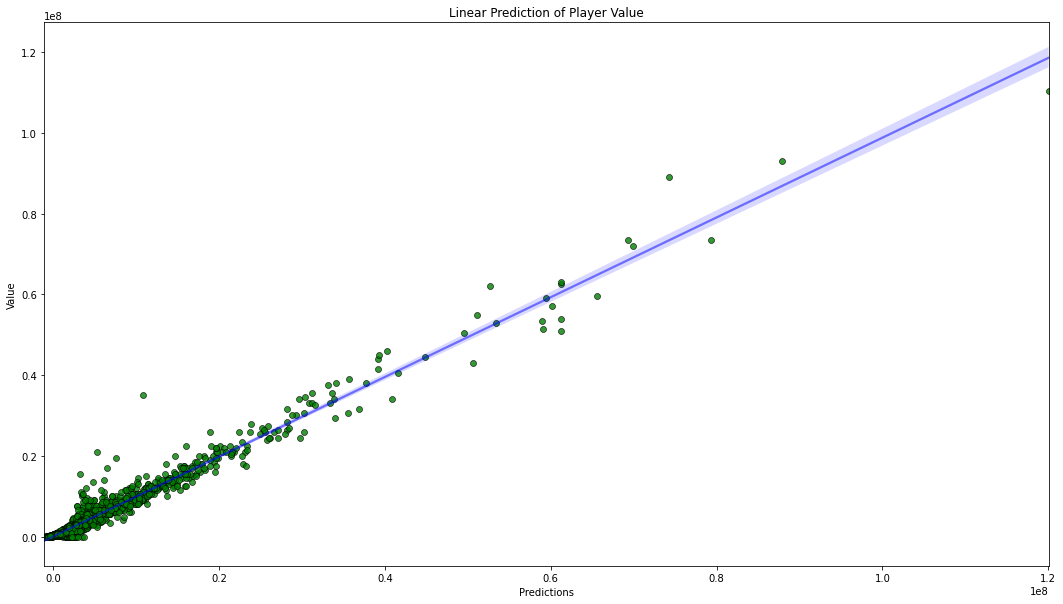

In [43]:
plt.figure(figsize=(18,10))
sns.regplot(x=predictions, y=y_test, scatter_kws={'color':'green','edgecolor':'black','linewidth':0.7}, line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Value')
plt.title('Linear Prediction of Player Value')
plt.show()

# Normalizar datos

Normalizar los datos se trata de escalar de manera individual los datos para tener un norma unitaria. Es útil cuando se utiliza una forma cuadrática o se intenta cuantificar la similitud entre un par de datos

En nuestro caso, al haber outliers en el dataframe, utilizaremos una normalización del tipo *robust scaler* ya que pueden influenciar la media/varianza de una forma negativa. La fórmula de dicha normalización es: (value - median) / (Q3(x) - Q1(x)); siendo value el dato a normalizar, median la mediana y Q1 el primer cuantil (0,25) y Q3 el segundo (0,75)

La función en cuestión en código propio es la siguiente:

------

                                def normalize(df_copy, col_name, value):

                                    Q1 = np.quantile(df_copy[col_name], 0.25)
                                    Q3 = np.quantile(df_copy[col_name], 0.75)

                                    T1 = value - df_copy[col_name].median()
                                    T2 = Q3-Q1

                                    if T2 != 0:
                                        result = T1/T2
                                    else :
                                        result = 0

                                    return result

                                scaled_df = df_copy.copy()
                                for col in scaled_df.columns:
                                    for index, row in scaled_df.iterrows():
                                        row[col] = normalize(df_copy, col, row[col])  
        
--------

En esta función se itera sobre los valores de todo el dataFrame, donde: se pasa por parámetros el dicho df, el nombre de la columna sobre la que iteramos y el valor correspondiente al que estamos calculando

Sin embargo, si esto lo utilizamos para iterar sobre todos los datos del dataFrame consume una gran cantidad de tiempo y por tanto utilizaremos *sklearn.preprocessing.RobustScaler* que realiza exactamente dicha función pero de forma mucho más óptima

In [44]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df_copy)
scaled_df = pd.DataFrame(transformer.transform(df_copy), columns=df_copy.columns)

In [45]:
scaled_df

Overall  Potential      Value    Wage   Special  \
0      3.111111      2.875  64.602941  70.250  1.718182   
1      3.111111      2.875  44.897059  50.250  1.796970   
2      2.888889      2.750  69.308824  35.875  1.539394   
3      2.777778      2.750  41.955882  32.125 -0.496970   
4      2.777778      2.625  59.602941  44.000  1.957576   
...         ...        ...        ...     ...       ...   
18142 -2.111111     -0.750  -0.361765  -0.250 -0.993939   
18143 -2.111111     -1.000  -0.361765  -0.250 -1.627273   
18144 -2.111111     -0.500  -0.361765  -0.250 -1.351515   
18145 -2.111111     -0.625  -0.361765  -0.250 -1.233333   
18146 -2.222222     -0.625  -0.361765  -0.250 -0.951515   

       International Reputation  Skill Moves  Crossing  Finishing  \
0                           4.0          2.0  1.153846    1.43750   
1                           4.0          3.0  1.153846    1.40625   
2                           4.0          3.0  0.961538    1.18750   
3                           3.0         -1.0 -1.423077   -1.12500   
4                           3.0          2.0  1.500000    1.03125   
...                         ...          ...       ...        ...   
18142                       0.0          0.0 -0.769231   -0.34375   
18143                       0.0          0.0 -1.192308    0.09375   
18144                       0.0          0.0 -1.115385   -0.28125   
18145                       0.0          0.0 -0.384615    0.03125   
18146                       0.0          0.0 -0.500000   -0.46875   

       HeadingAccuracy  ShortPassing   Volleys  Dribbling     Curve  \
0                 0.70      2.000000  1.555556   1.894737  1.607143   
1                 1.65      1.357143  1.592593   1.421053  1.178571   
2                 0.30      1.571429  1.481481   1.842105  1.428571   
3                -1.75     -0.857143 -1.148148  -2.263158 -0.964286   
4                -0.05      2.142857  1.407407   1.315789  1.321429   
...                ...           ...       ...        ...       ...   
18142            -0.80     -0.928571 -0.703704  -1.000000 -0.642857   
18143            -0.20     -1.357143 -0.296296  -1.157895 -0.571429   
18144            -0.50     -1.714286 -0.222222  -0.842105 -0.357143   
18145            -0.85     -1.428571 -0.148148  -0.526316 -0.500000   
18146            -0.50     -1.000000 -0.518519  -0.947368 -0.285714   

       FKAccuracy  LongPassing  BallControl  Acceleration   Agility  \
0        2.038462     1.476190     2.200000      1.333333  1.315789   
1        1.346154     1.000000     2.066667      1.222222  1.105263   
2        1.769231     1.047619     2.133333      1.500000  1.578947   
3       -0.846154    -0.238095    -1.400000     -0.555556 -0.315789   
4        1.615385     1.666667     1.866667      0.611111  0.684211   
...           ...          ...          ...           ...       ...   
18142   -0.269231    -0.523810    -1.333333     -0.722222 -0.315789   
18143   -0.807692    -1.476190    -1.533333     -1.444444 -1.473684   
18144   -0.538462    -1.333333    -1.266667      0.166667 -0.842105   
18145   -0.346154    -1.142857    -0.733333     -0.333333 -0.736842   
18146   -0.269231    -0.571429    -0.800000     -0.555556 -0.578947   

       Reactions   Balance  ShotPower   Jumping   Stamina  Strength  \
0       2.750000  1.611111   1.130435  0.133333  0.333333   -0.5000   
1       2.833333  0.222222   1.565217  1.933333  1.222222    0.7500   
2       2.666667  1.000000   0.913043 -0.333333  0.833333   -1.1250   
3       2.333333 -1.277778  -1.217391  0.066667 -1.277778   -0.1875   
4       2.416667  0.611111   1.391304 -0.200000  1.333333    0.5000   
...          ...       ...        ...       ...       ...       ...   
18142  -1.083333  0.555556  -0.695652 -0.733333 -1.444444   -1.2500   
18143  -1.833333 -0.777778  -0.782609 -1.266667 -1.277778    0.0000   
18144  -1.250000 -0.444444  -0.608696 -0.400000 -0.611111   -2.1875   
18145  -3.416667  0.277778   0.217391 -1.600000 -1.444

Ahora realizaremos un segundo entrenamiento para observar los posibles cambios sobre la predicción

In [46]:
y = scaled_df['Value']
X = scaled_df.drop('Value', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(5445, 37) (12702, 37)
(5445,) (12702,)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [48]:
print('r2 score: '+str(r2_score(y_test, predictions)))

r2 score: 0.967327163620676


Como podemos observar, en esta ocasión no se ha producido ningún cambio significativo en R2 score (prácticamente 0) tras haber realizado la normalización de los datos.

En caso de querer observar los estadísticos sobre la predicción en las unidades adecuadas podremos obtener mediante *inverse_form()* de *RobustScaler()* el valor previo a la normalización realizando la operación anterior en orden contrario.

Como se hizo anteriormente, se mostrará el código propio:

---

                                    def inverse(df_copy, value):

                                        Q1 = np.quantile(df_copy['Value'], 0.25)
                                        Q3 = np.quantile(df_copy['Value'], 0.75)

                                        T1 = df_copy['Value'].median()
                                        T2 = Q3-Q1

                                        if T2 != 0:
                                            result = (value*T2)+T1
                                        else :
                                            result = 0
                                            
                                        return result
        
---

Se tiene en cuenta la columna *Value* ya que la predicción es sobre dicha columna y, por tanto, están normalizados en relación a su magnitud (mediana y cuantiles). Además, *value* representa el valor producto de la iteración sobre los valores